In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Description:

ID: Unique identifier for each patient.

age: Age of the patient in days.

age_years: Age of the patient in years (derived from age).

gender: Gender of the patient. Categorical variable (1: Female, 2: Male).

height: Height of the patient in centimeters.

weight: Weight of the patient in kilograms.

ap_hi: Systolic blood pressure.

ap_lo: Diastolic blood pressure.

cholesterol: Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).

gluc: Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).

smoke: Smoking status. Binary variable (0: Non-smoker, 1: Smoker).

alco: Alcohol intake. Binary variable (0: Does not consume alcohol, 1: Consumes alcohol).

active: Physical activity. Binary variable (0: Not physically active, 1: Physically active).

cardio: Presence or absence of cardiovascular disease. Target variable. Binary (0: Absence, 1: Presence).

bmi: Body Mass Index, derived from weight and height. Calculated as ( \text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2} ).

bp_category: Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".

<b>bp_category_encoded</b>: Encoded form of bp_category for machine learning purposes.


[Get data](https://www.kaggle.com/datasets/colewelkins/cardiovascular-disease)

In [2]:
data = pd.read_csv('cardio_data_processed.csv')

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [4]:
data.shape

(68205, 17)

In [5]:
data.drop('id',axis=1,inplace=True)

In [6]:
data.head(15)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
5,21914,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,Hypertension Stage 1,Hypertension Stage 1
6,22113,1,157,93.0,130,80,3,1,0,0,1,0,60,37.729725,Hypertension Stage 1,Hypertension Stage 1
7,22584,2,178,95.0,130,90,3,3,0,0,1,1,61,29.983588,Hypertension Stage 1,Hypertension Stage 1
8,17668,1,158,71.0,110,70,1,1,0,0,1,0,48,28.440955,Normal,Normal
9,19834,1,164,68.0,110,60,1,1,0,0,0,0,54,25.282570,Normal,Normal


# Insights :

1. Conversion of age column to age in Years
2. bp_category and bp_category_encoded are same, one can be dropped

In [7]:
df = data.copy()

In [8]:
df['age_years'] = df['age']/365

df.drop('bp_category_encoded',axis=1,inplace=True)

In [9]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,Hypertension Stage 1
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,Hypertension Stage 2
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,Hypertension Stage 1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479,Hypertension Stage 2
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177,Normal


# EDA 

In [10]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
bp_category    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68205 non-null  int64  
 1   gender       68205 non-null  int64  
 2   height       68205 non-null  int64  
 3   weight       68205 non-null  float64
 4   ap_hi        68205 non-null  int64  
 5   ap_lo        68205 non-null  int64  
 6   cholesterol  68205 non-null  int64  
 7   gluc         68205 non-null  int64  
 8   smoke        68205 non-null  int64  
 9   alco         68205 non-null  int64  
 10  active       68205 non-null  int64  
 11  cardio       68205 non-null  int64  
 12  age_years    68205 non-null  float64
 13  bmi          68205 non-null  float64
 14  bp_category  68205 non-null  object 
dtypes: float64(3), int64(11), object(1)
memory usage: 7.8+ MB


In [12]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,53.322377,27.510513
std,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.762690,6.026497
min,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583562,3.471784
25%,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.372603,23.875115
50%,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.972603,26.346494
75%,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.419178,30.116213
max,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967123,298.666667


In [13]:
categorical_col = []
numerical_col = []

for col in df.columns:
    if df[col].dtype=='O':
        categorical_col.append(col)
    else:
        numerical_col.append(col)

In [14]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi',
       'bp_category'],
      dtype='object')

In [15]:
categorical_col

['bp_category']

In [16]:
numerical_col

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio',
 'age_years',
 'bmi']

In [17]:
# sns.countplot(df,'cardio')

In [18]:
df['cardio'].value_counts()

cardio
0    34533
1    33672
Name: count, dtype: int64

In [167]:
df['bp_category'].value_counts().index

Index(['Hypertension Stage 1', 'Hypertension Stage 2', 'Normal', 'Elevated'], dtype='object', name='bp_category')

In [19]:
categorical_col

['bp_category']

<Axes: xlabel='bp_category', ylabel='count'>

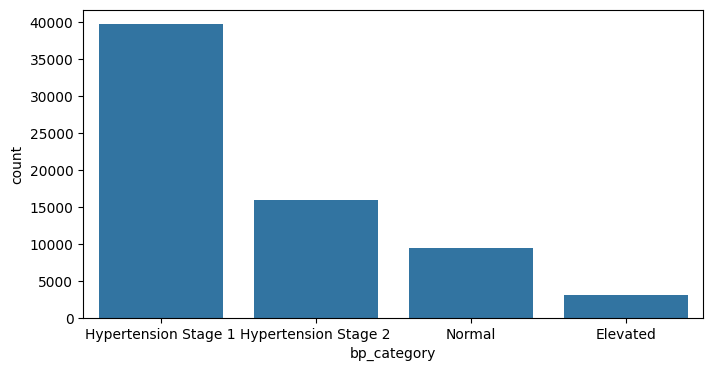

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(data = df,x='bp_category')

<Axes: xlabel='bp_category', ylabel='count'>

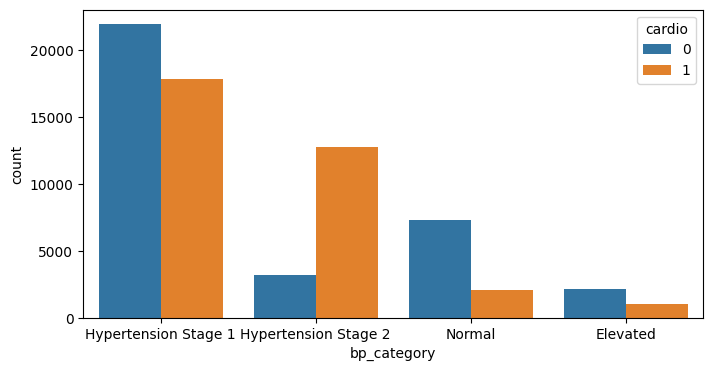

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(data = df,x='bp_category',hue='cardio')

In [22]:
df['bp_category'].value_counts()

bp_category
Hypertension Stage 1    39750
Hypertension Stage 2    15937
Normal                   9417
Elevated                 3101
Name: count, dtype: int64

In [23]:
numerical_col

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio',
 'age_years',
 'bmi']

In [24]:
# [gender, cholestrol, gluc,smoke,cardio,alco,active]

cols_to_remove = ['gender', 'cholesterol', 'gluc','smoke','cardio','alco','active']

for col in cols_to_remove:
    numerical_col.remove(col)


In [25]:
numerical_col

['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

In [26]:
sns.set_palette(sns.color_palette(["#DF31F0"]))

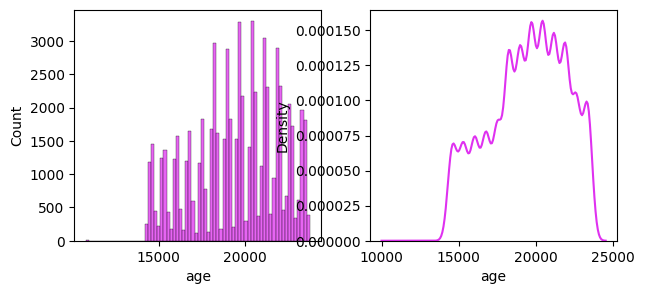

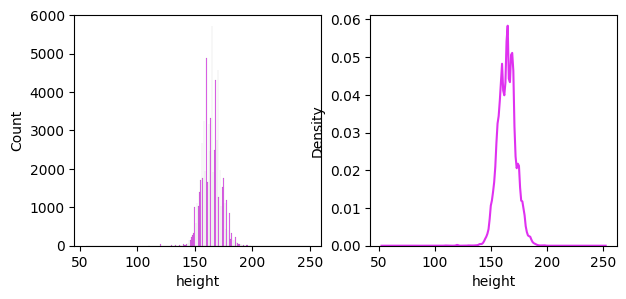

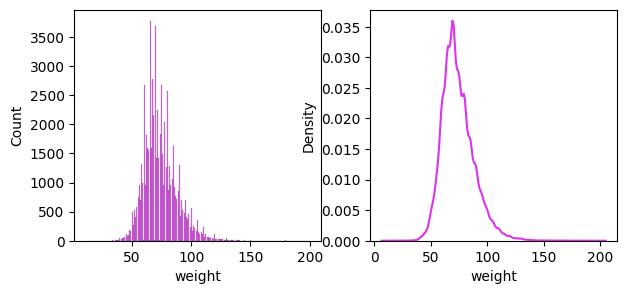

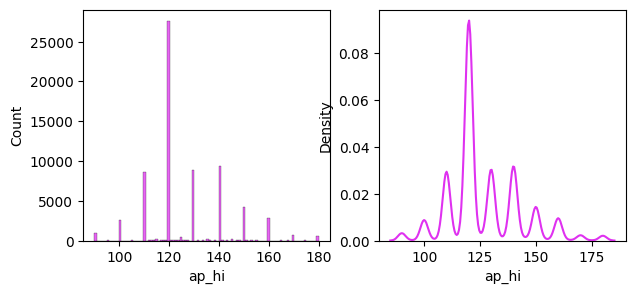

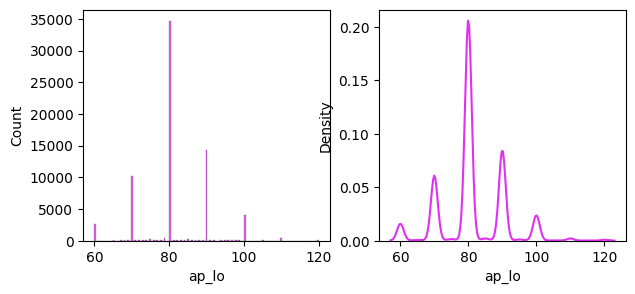

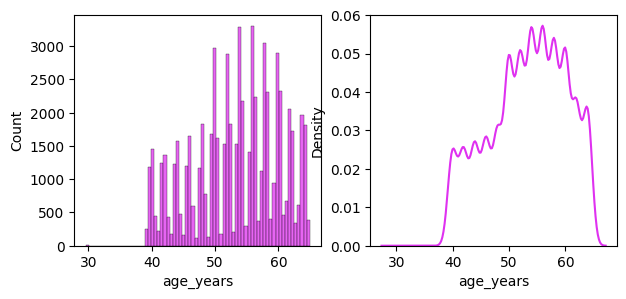

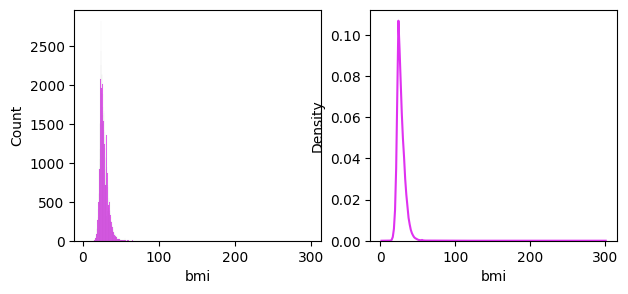

In [27]:
for col in numerical_col:
    fig, axs = plt.subplots(1, 2, figsize=(7, 3))
    
    sns.histplot(df[col],ax=axs[0])
    sns.kdeplot(df[col],ax=axs[1])
    
    

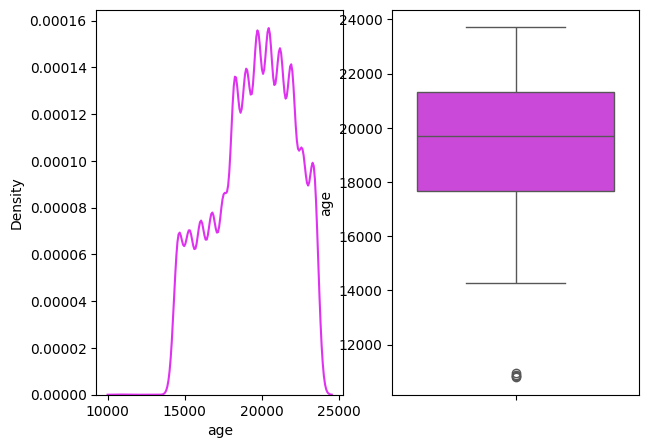

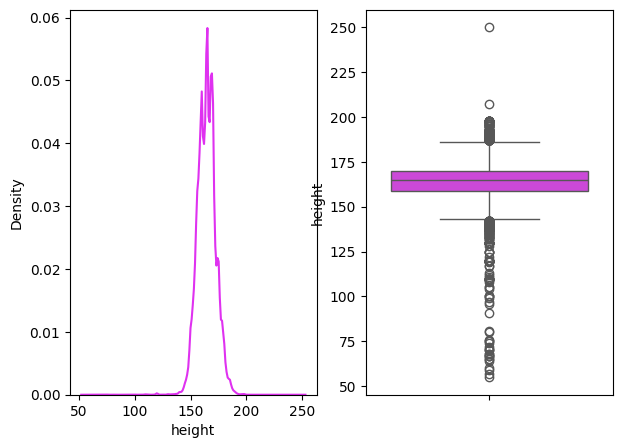

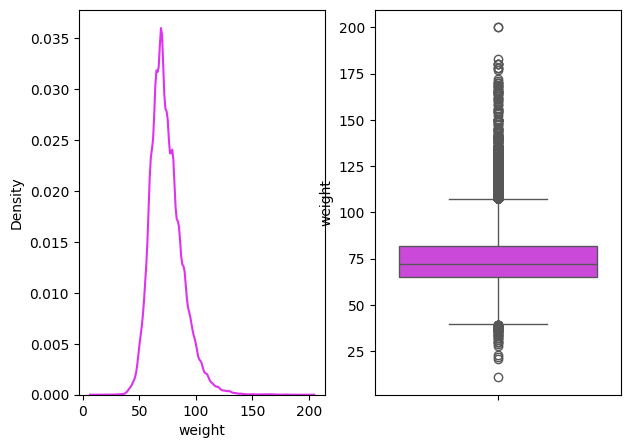

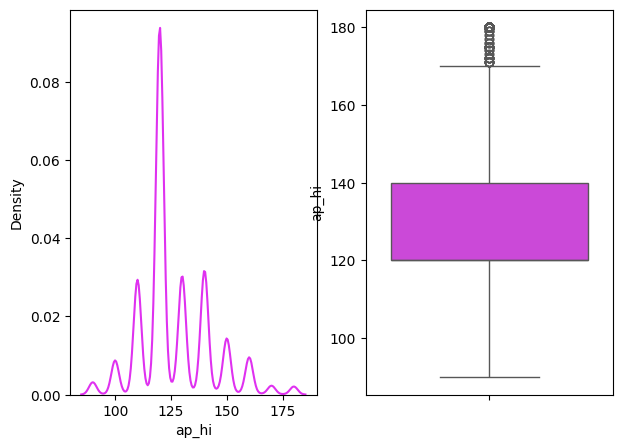

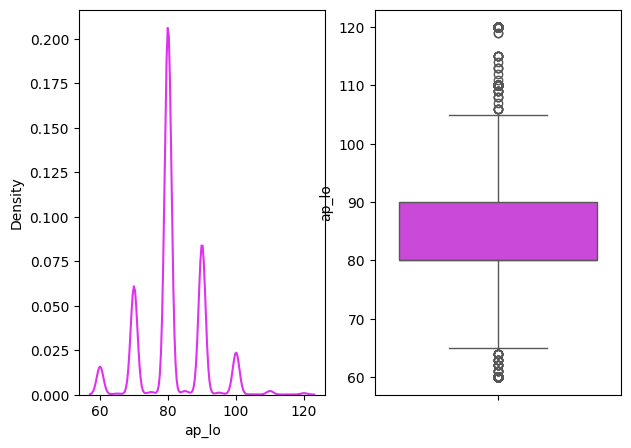

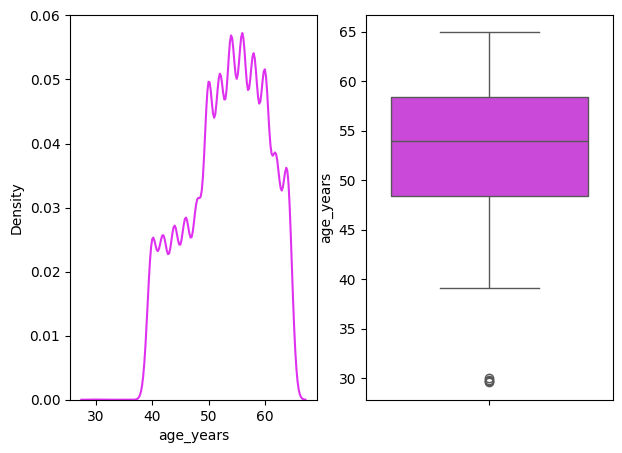

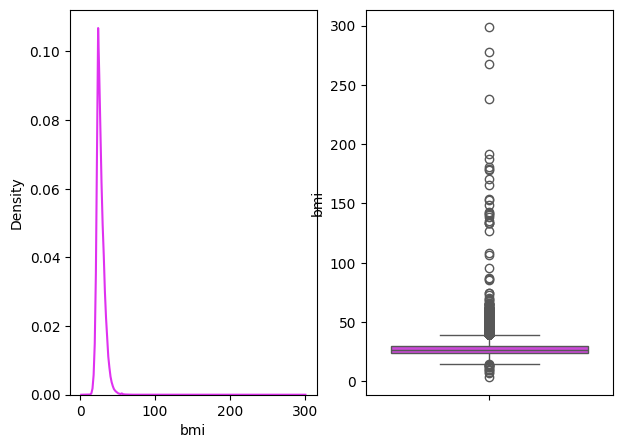

In [28]:
for col in numerical_col:
    fig, axs = plt.subplots(1, 2, figsize=(7, 5))
    
    sns.kdeplot(df[col],ax=axs[0])
    sns.boxplot(df[col],ax=axs[1])

In [29]:
# sns.pairplot(df)

In [30]:
categorical_col.extend(['gender', 'cholesterol', 'gluc','smoke','cardio','alco','active'])

In [31]:
categorical_col

['bp_category',
 'gender',
 'cholesterol',
 'gluc',
 'smoke',
 'cardio',
 'alco',
 'active']

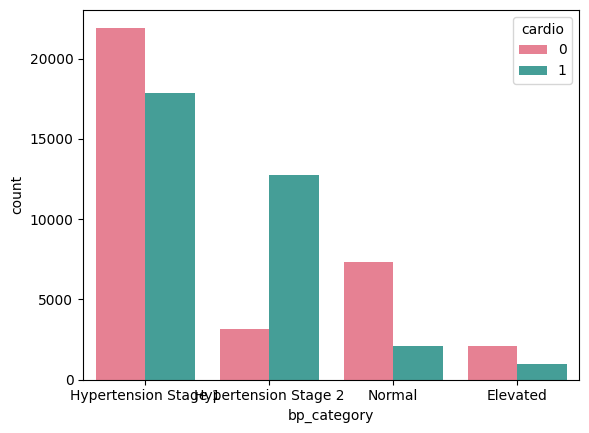

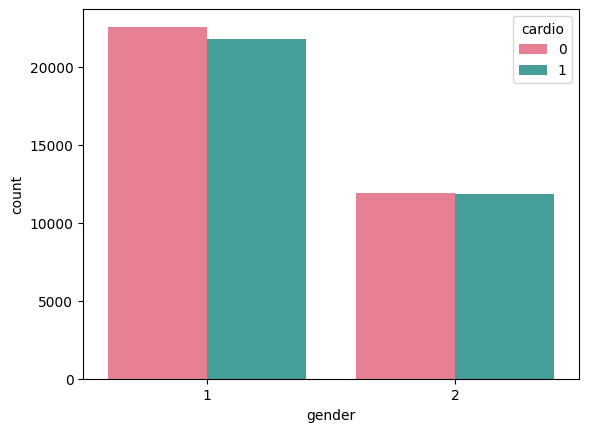

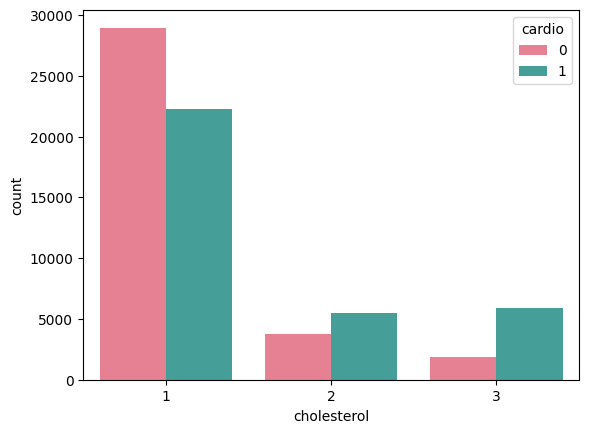

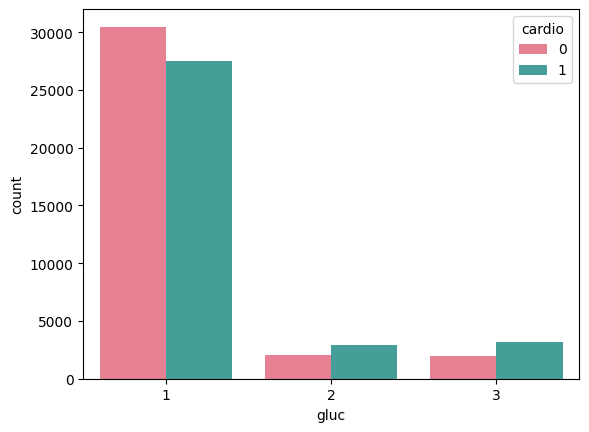

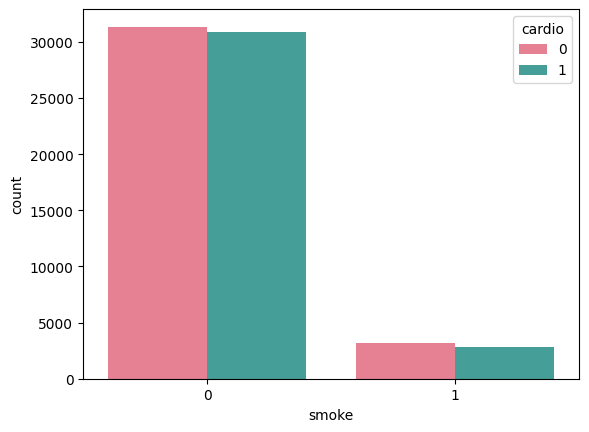

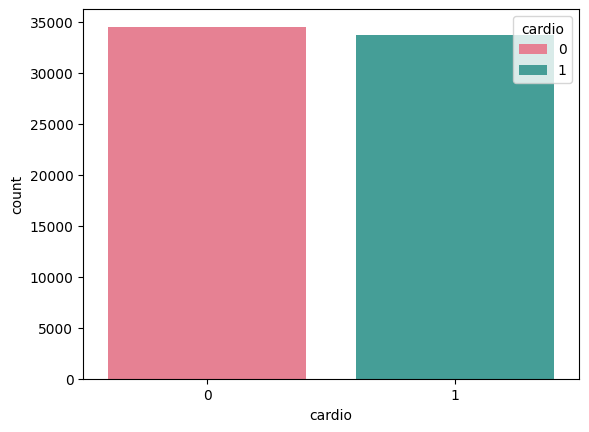

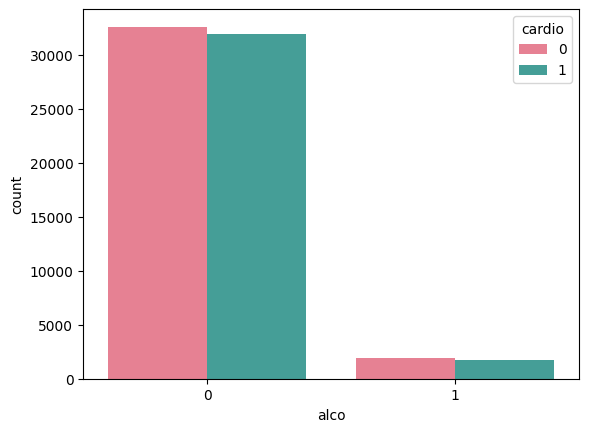

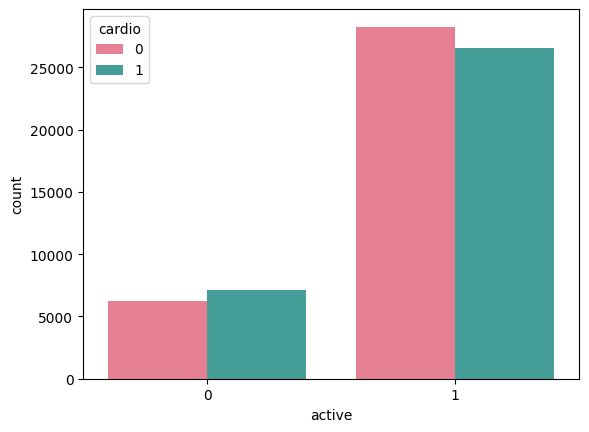

In [32]:
for col in categorical_col:
    
    plt.figure()
    
    sns.countplot(data = df,x=col,hue='cardio',)
#     sns.barplot(df[col],ax=axs[1],orient='h')

In [33]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,Hypertension Stage 1
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,Hypertension Stage 2
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,Hypertension Stage 1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479,Hypertension Stage 2
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177,Normal


# Handling Outliers 

# Power Transformation 

In [34]:
numerical_col

['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

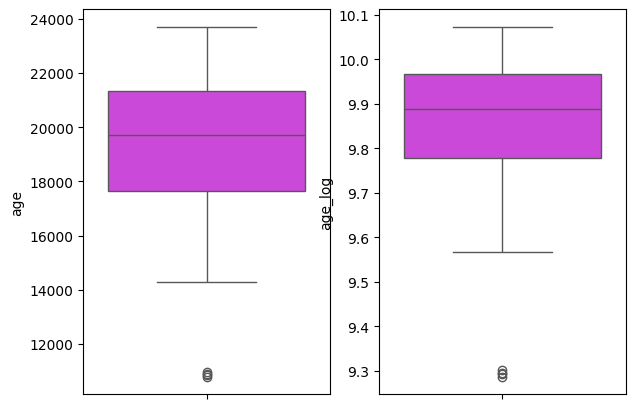

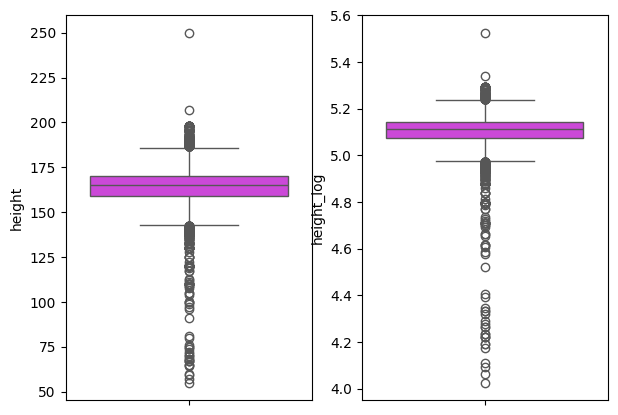

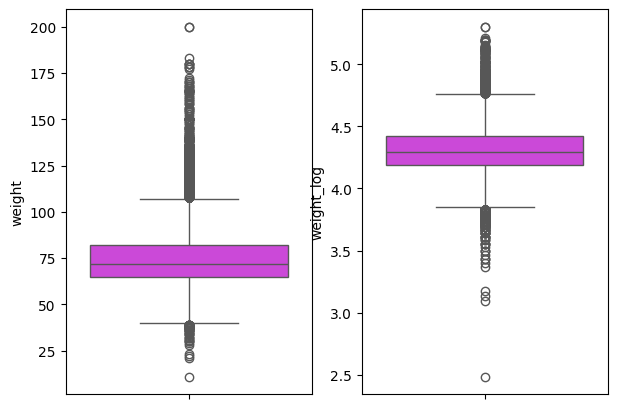

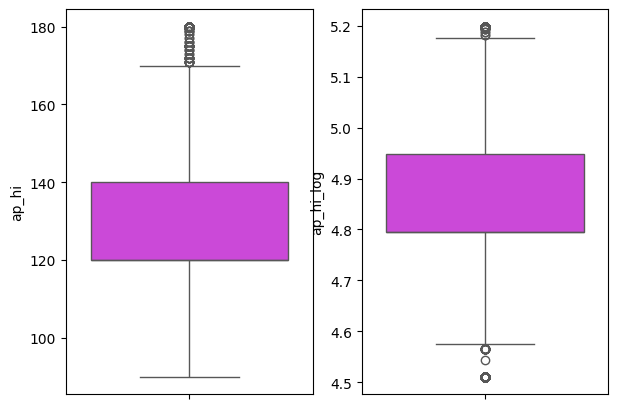

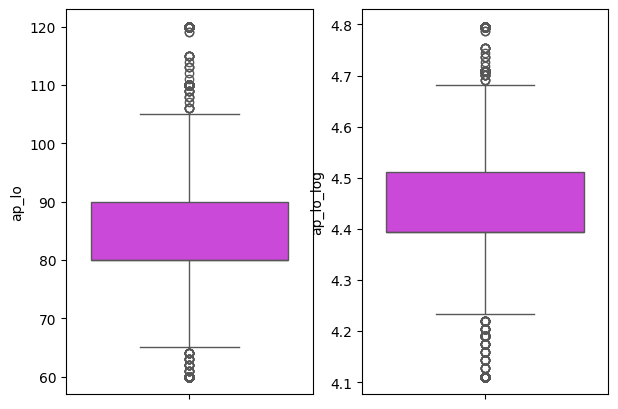

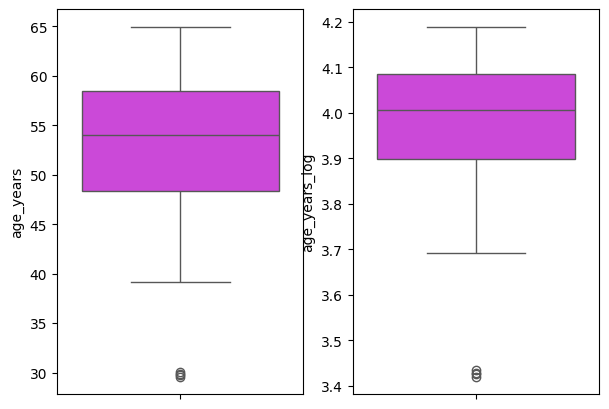

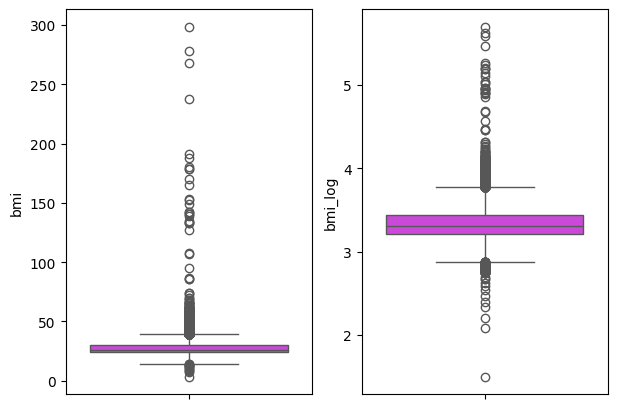

In [35]:
for col in numerical_col:
    
    df[col+'_log'] = np.log1p(df[col])
    
    fig,axs = plt.subplots(1,2,figsize=(7,5))
    
    sns.boxplot(df[col],ax=axs[0])
    sns.boxplot(df[col+'_log'],ax=axs[1])
    

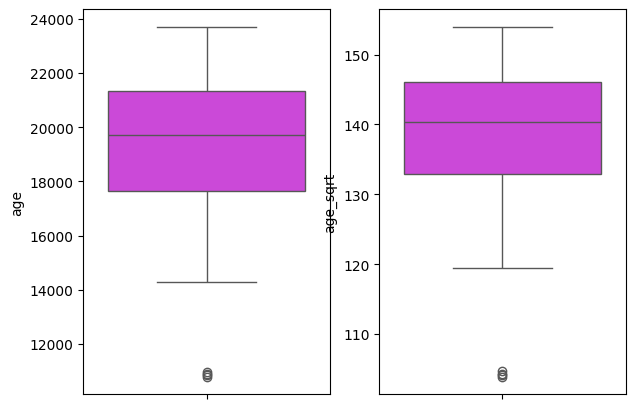

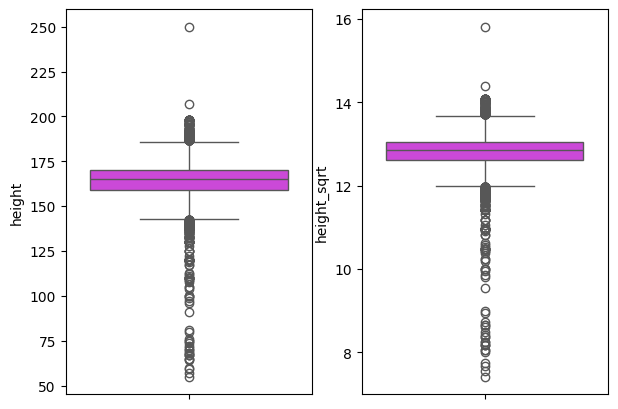

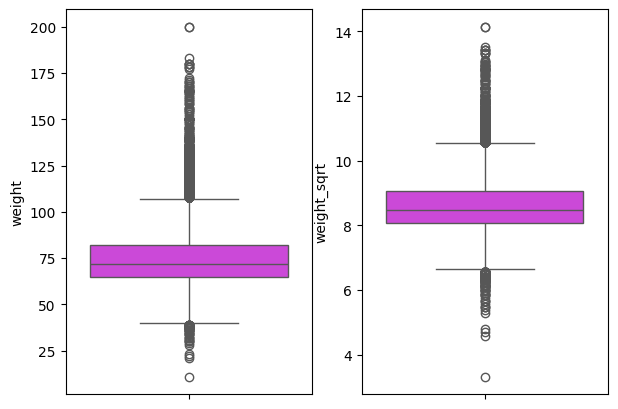

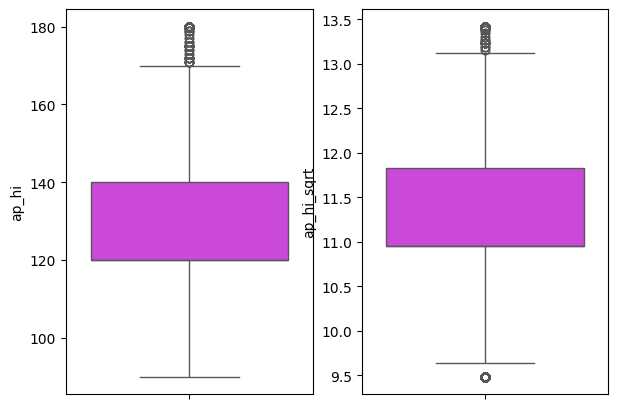

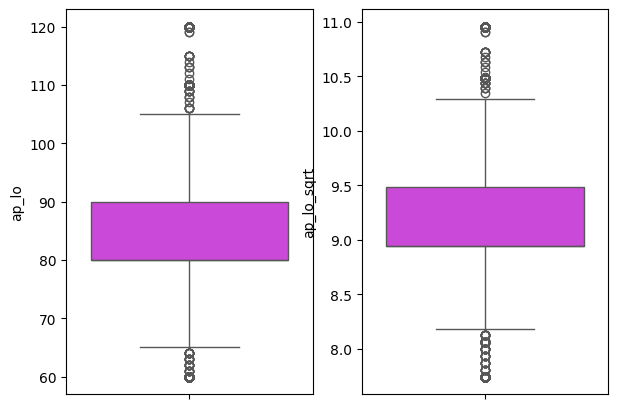

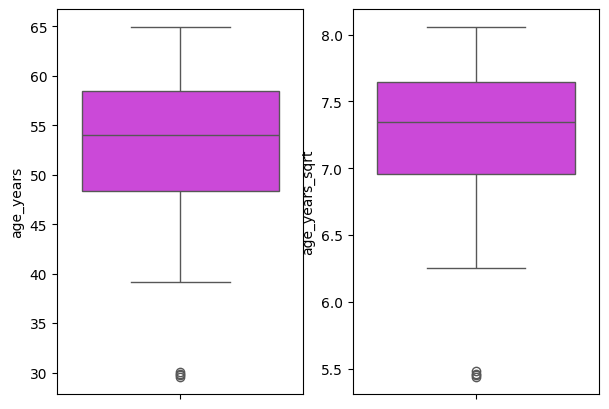

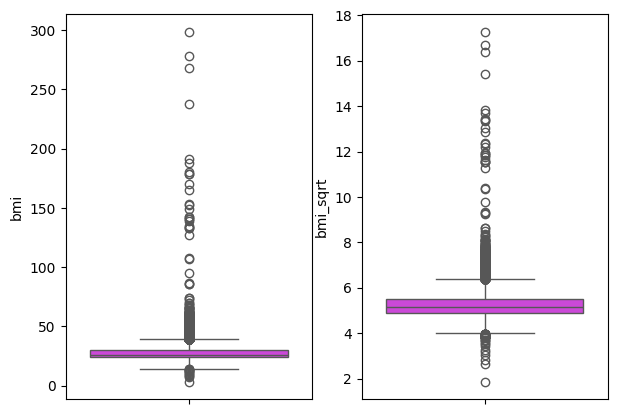

In [36]:
for col in numerical_col:
    
    df[col+'_sqrt'] = np.sqrt(df[col])
    
    fig,axs = plt.subplots(1,2,figsize=(7,5))
    
    sns.boxplot(df[col],ax=axs[0])
    sns.boxplot(df[col+'_sqrt'],ax=axs[1])
    

In [37]:
from sklearn.preprocessing import PowerTransformer

In [38]:
pt = PowerTransformer(method='box-cox')

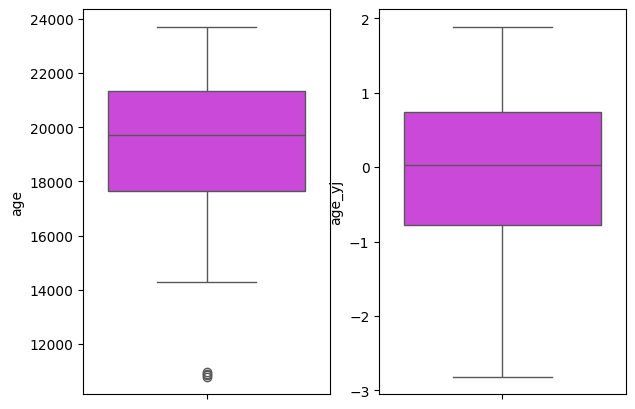

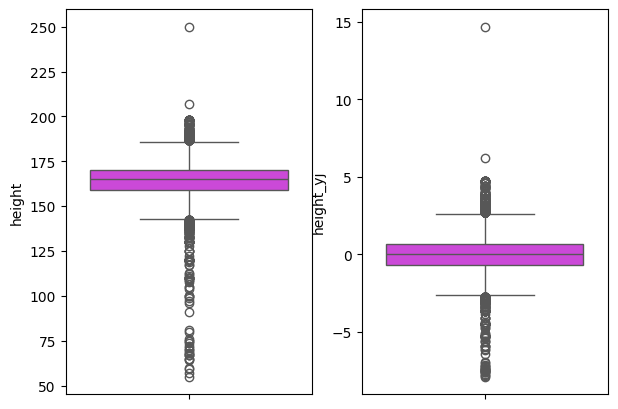

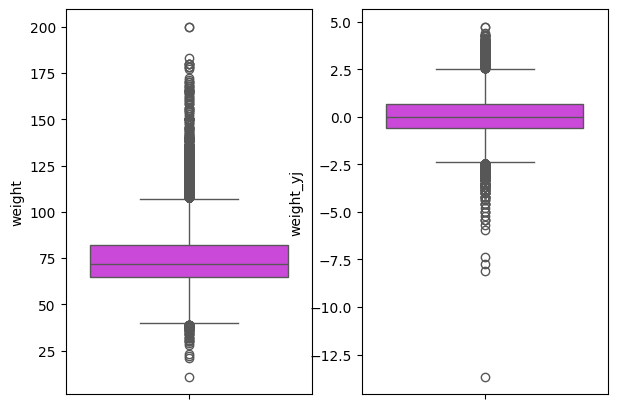

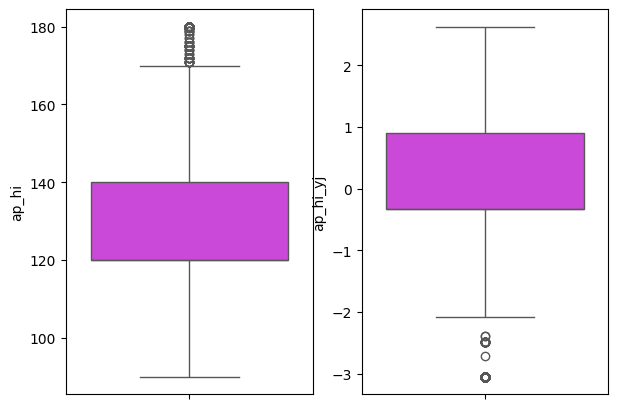

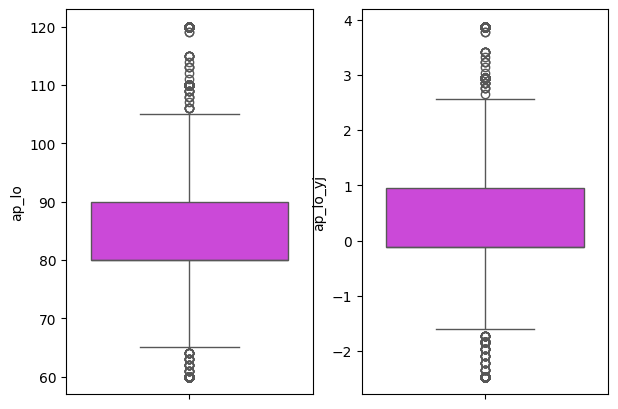

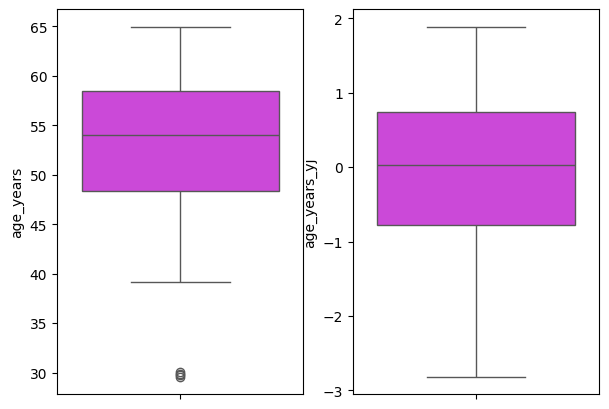

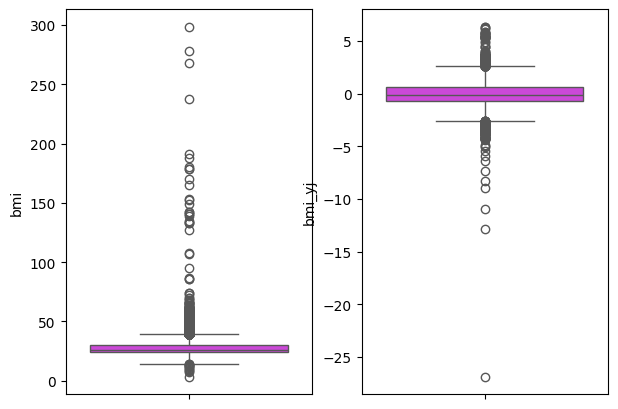

In [39]:
for col in numerical_col:
    
    df[col+'_yj'] = pt.fit_transform(df[col].values.reshape(-1,1))
    
    fig,axs = plt.subplots(1,2,figsize=(7,5))
    sns.boxplot(df[col],ax=axs[0])
    sns.boxplot(df[col+'_yj'],ax=axs[1])

# IQR and Winsorization 

In [40]:
numerical_col

['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

In [41]:
numerical_dict = dict.fromkeys(numerical_col)

numerical_dict

{'age': None,
 'height': None,
 'weight': None,
 'ap_hi': None,
 'ap_lo': None,
 'age_years': None,
 'bmi': None}

In [42]:
for col in numerical_col:
    pcile25 = df[col].quantile(0.25)

    pcile75 = df[col].quantile(0.75)

    iqr = pcile75-pcile25

    upper_fence = pcile75+(1.5*iqr)
    lower_fence = pcile25-(1.5*iqr)

    numerical_dict[col] = [upper_fence,lower_fence]

In [43]:
# stop

In [44]:
numerical_dict

{'age': [26823.5, 12155.5],
 'height': [186.5, 142.5],
 'weight': [107.5, 39.5],
 'ap_hi': [170.0, 90.0],
 'ap_lo': [105.0, 65.0],
 'age_years': [73.4890410958904, 33.3027397260274],
 'bmi': [39.47786070351006, 14.513467232623075]}

In [45]:
df[(df['height']>numerical_dict['height'][0]) | (df['height']<numerical_dict['height'][1])].shape[0]

502

In [46]:
for col in numerical_col:
    rows = df[(df[col]>numerical_dict[col][0]) | (df[col]<numerical_dict[col][1])].shape[0]
    print(f'{col.ljust(15)}: {rows}, {rows*100/df.shape[0]}')

age            : 4, 0.005864672677956161
height         : 502, 0.7360164210834983
weight         : 1711, 2.508613737995748
ap_hi          : 648, 0.9500769738288982
ap_lo          : 3188, 4.674144124331061
age_years      : 4, 0.005864672677956161
bmi            : 1988, 2.9147423209442125


In [47]:
df.shape

(68205, 36)

In [48]:
df_copy1 = df.copy()

In [49]:
df_copy1.shape

(68205, 36)

In [50]:
# trimming

for col in numerical_col:
    
#     df_copy1 = pd.DataFrame(columns=[col])
    
    df_copy1 = df[(df[col]<=numerical_dict[col][0]) & (df[col]>=numerical_dict[col][1])]

In [51]:
df_copy1.shape

(66217, 36)

In [52]:
100*(df.shape[0]-df_copy1.shape[0])/df.shape[0]

2.9147423209442125

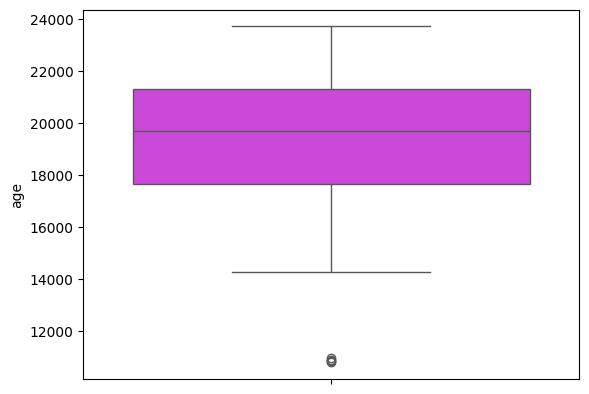

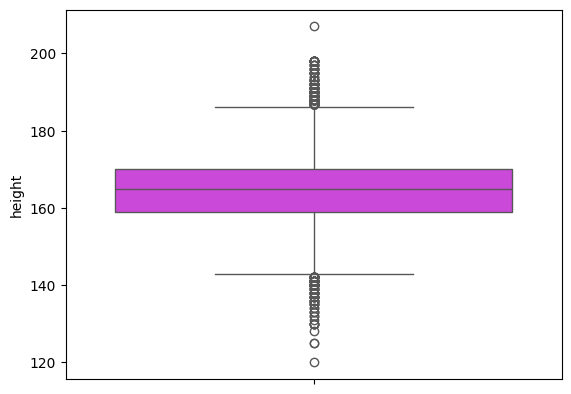

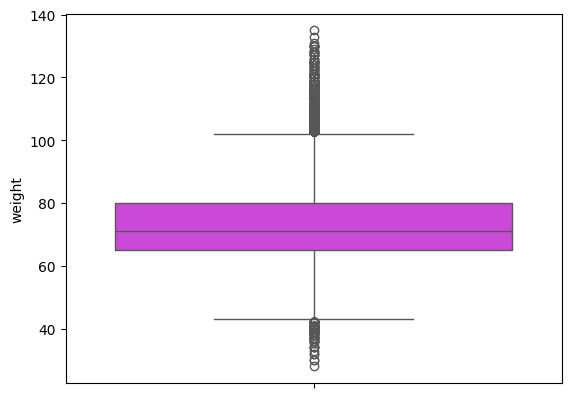

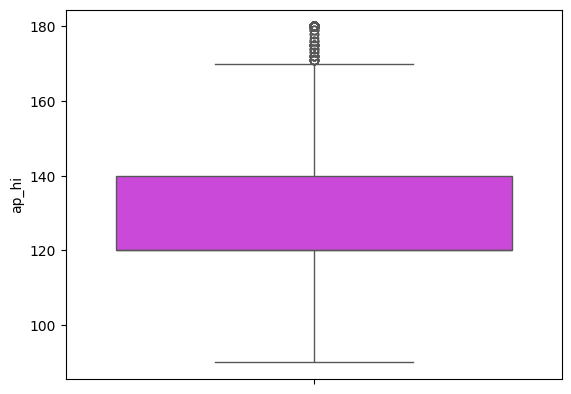

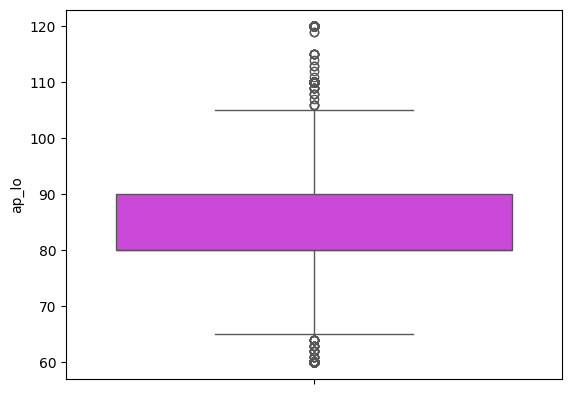

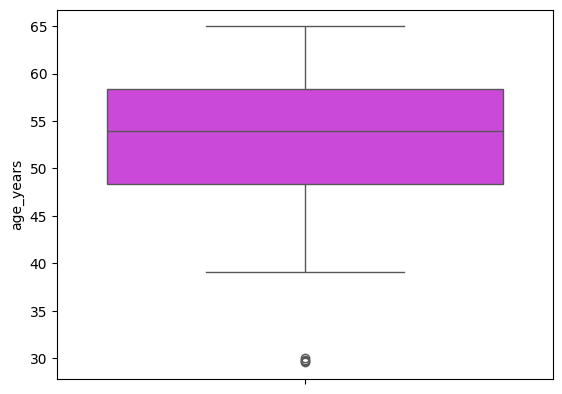

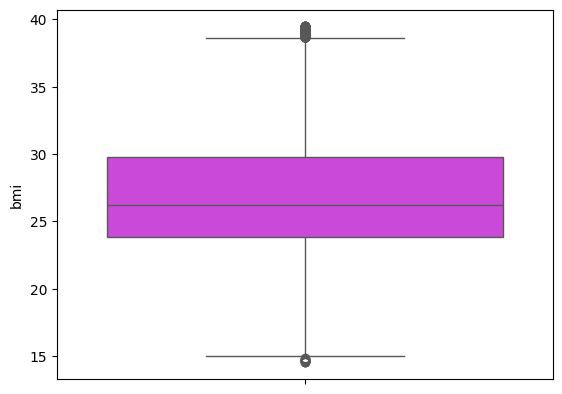

In [53]:
for col in numerical_col:
    plt.figure()
    sns.boxplot(df_copy1[col])

# Winzorization 

In [54]:
df.shape

(68205, 36)

In [55]:
# for col in numerical_col:
#     pcile25 = df[col].quantile(0.25)

#     pcile75 = df[col].quantile(0.75)

#     iqr = pcile75-pcile25

#     upper_fence = pcile75+(1.5*iqr)
#     lower_fence = pcile25-(1.5*iqr)

#     numerical_dict[col] = [upper_fence,lower_fence]
    
    
# np.percentile()

In [56]:
def winzorize(column):
    
    lower_limit = np.percentile(column,5)
    upper_limit = np.percentile(column,95)
    
    return np.clip(column,lower_limit,upper_limit)
    

In [57]:
numerical_col

['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

In [58]:
df[numerical_col] = df[numerical_col].apply(lambda x:winzorize(x))

# df[numerical_col] = df[numerical_col].apply(winzorize)

In [59]:
df.shape

(68205, 36)

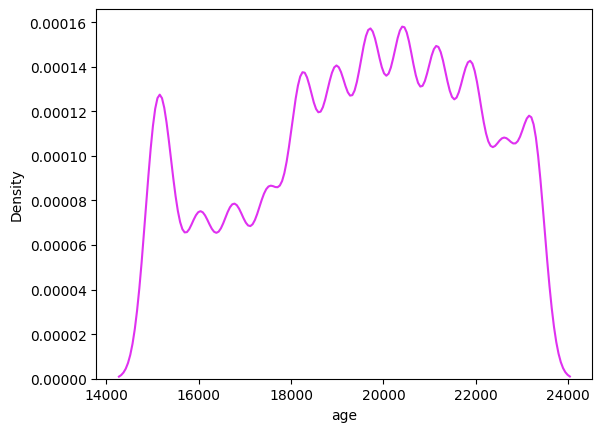

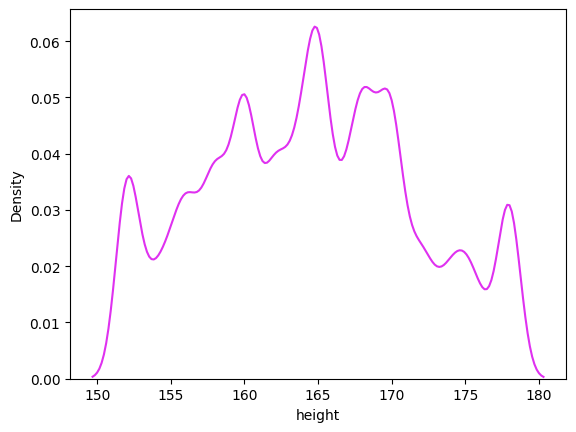

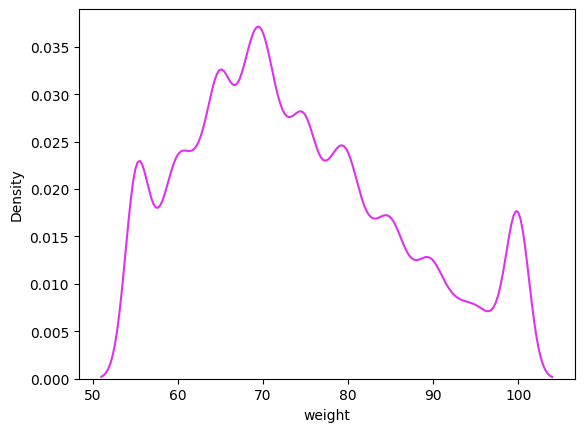

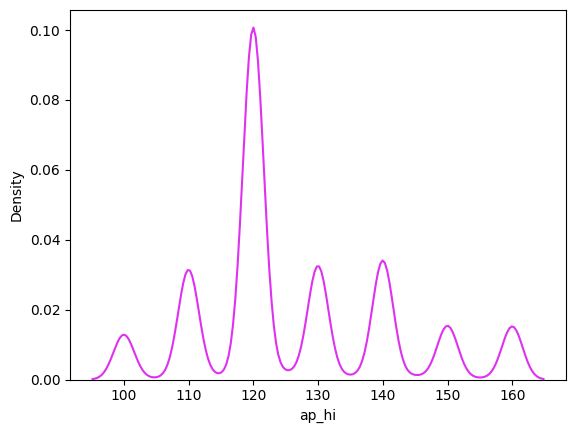

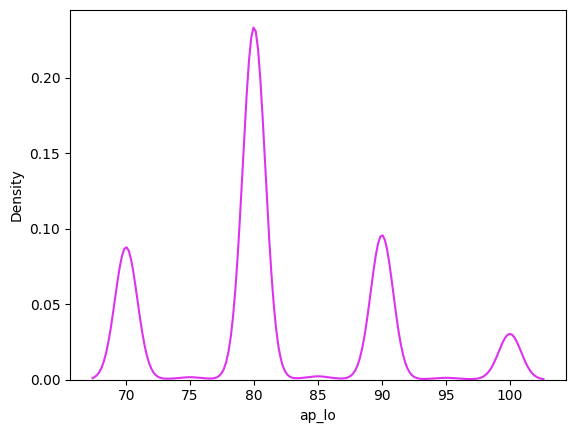

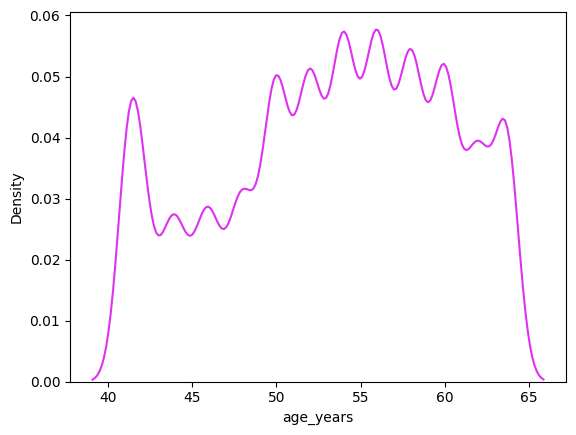

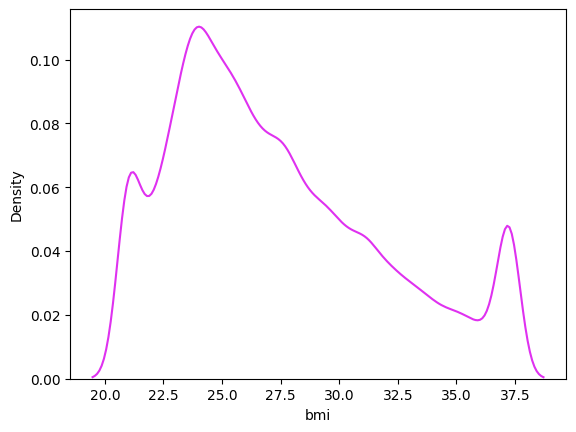

In [60]:
for col in numerical_col:
    plt.figure()
    sns.kdeplot(df[col])

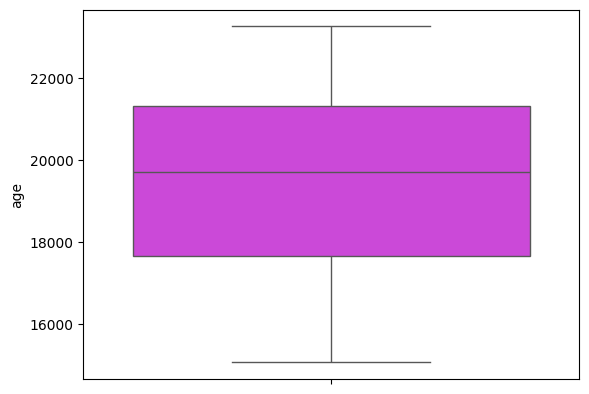

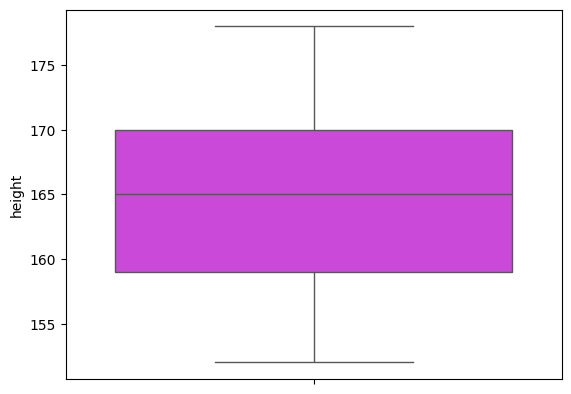

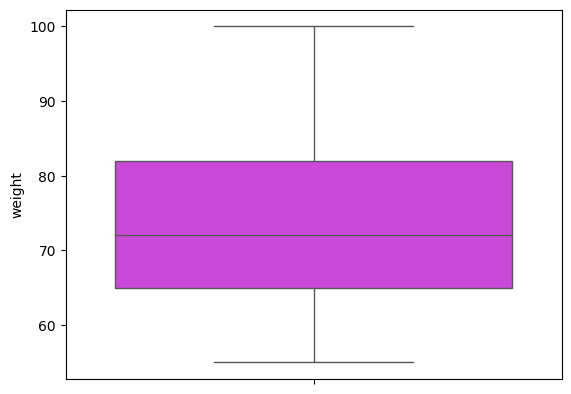

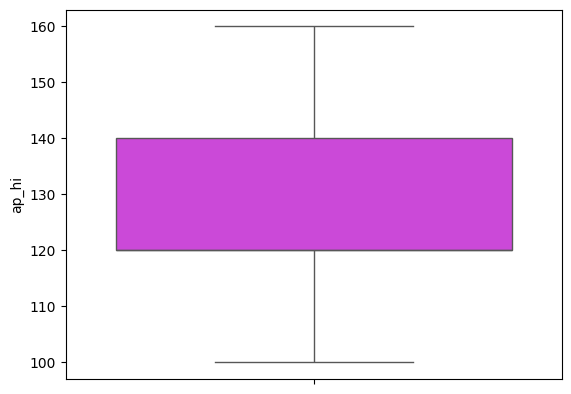

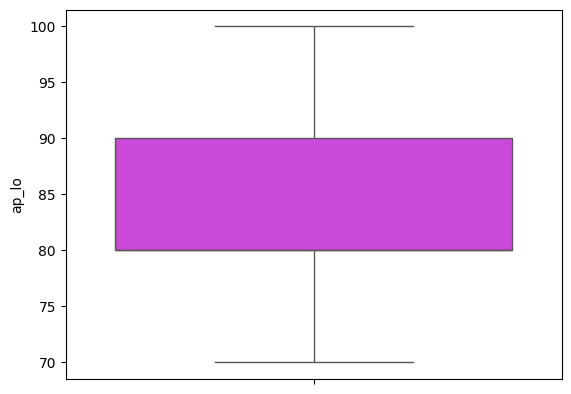

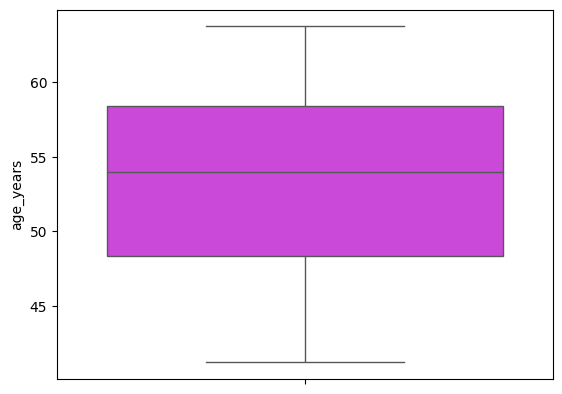

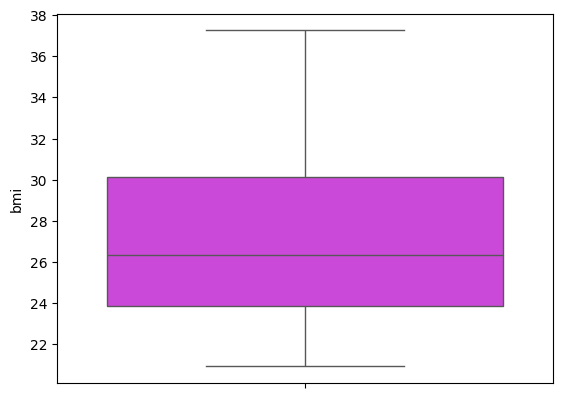

In [61]:
for col in numerical_col:
    plt.figure()
    sns.boxplot(df[col])

In [62]:
list(df.columns).index('bp_category')

14

In [63]:
df.head(1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,ap_lo_sqrt,age_years_sqrt,bmi_sqrt,age_yj,height_yj,weight_yj,ap_hi_yj,ap_lo_yj,age_years_yj,bmi_yj
0,18393.0,2,168,62.0,110,80,1,1,0,0,...,8.944272,7.098717,4.686909,-0.495966,0.421548,-0.860126,-1.085707,-0.112133,-0.495966,-1.18599


In [64]:
df = df.iloc[:,:15]

In [65]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi',
       'bp_category'],
      dtype='object')

In [66]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,18393.0,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,Hypertension Stage 1
1,20228.0,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,Hypertension Stage 2
2,18857.0,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,Hypertension Stage 1
3,17623.0,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479,Hypertension Stage 2
4,17474.0,1,156,56.0,100,70,1,1,0,0,0,0,47.873973,23.011177,Normal


In [67]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
bp_category    0
dtype: int64

In [68]:
df.drop('age_years',axis=1,inplace=True)

# Model training 

In [69]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [70]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bp_category
0,18393.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Hypertension Stage 1
1,20228.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Hypertension Stage 2
2,18857.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Hypertension Stage 1
3,17623.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Hypertension Stage 2
4,17474.0,1,156,56.0,100,70,1,1,0,0,0,0,23.011177,Normal


In [71]:
df['bp_category'].value_counts()

bp_category
Hypertension Stage 1    39750
Hypertension Stage 2    15937
Normal                   9417
Elevated                 3101
Name: count, dtype: int64

In [72]:
df.shape

(68205, 14)

In [73]:
cols_to_scale = ['age','height','weight','ap_hi','ap_lo','bmi']
cols_to_enc = ['bp_category']

In [74]:
X = df.drop('cardio',axis=1)

y = df['cardio']

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [76]:
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bp_category
46861,19073.0,2,166,68.0,120,80,1,1,0,0,1,24.677021,Hypertension Stage 1
66280,15156.0,1,152,60.0,120,80,1,1,0,0,1,26.666667,Hypertension Stage 1
29903,19787.0,1,153,78.0,120,80,1,1,0,0,1,33.320518,Hypertension Stage 1
62125,17308.0,1,168,62.0,120,80,1,1,1,0,1,21.967120,Hypertension Stage 1
5123,22820.0,1,156,74.0,150,100,1,2,0,0,1,30.407627,Hypertension Stage 2


In [77]:
y_train

46861    0
66280    0
29903    0
62125    0
5123     0
        ..
46555    0
51228    0
6353     1
34814    1
60418    0
Name: cardio, Length: 47743, dtype: int64

In [78]:
# Pipeline([(name,TRANSFORMER_OBJECT),(),(),()])

In [79]:
numerical_pipe = Pipeline(steps=[('minmax',MinMaxScaler())])

categorical_pipe = Pipeline(steps=[('ohe',OneHotEncoder(drop='first'))])

In [80]:
preprocessor = ColumnTransformer(transformers=[('num',numerical_pipe,cols_to_scale),
                                               ('enc',categorical_pipe,cols_to_enc)],
                                remainder='passthrough')

In [81]:
dt_pipe = Pipeline(steps=[('preprocessor',preprocessor),
                             ('decisiontree',DecisionTreeClassifier())])

In [82]:
dt_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['age', 'height', 'weight',
                                                   'ap_hi', 'ap_lo', 'bmi']),
                                                 ('enc',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['bp_category'])])),
                ('decisiontree', DecisionTreeClassifier())])

In [83]:
y_pred = dt_pipe.predict(X_test)

In [84]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [85]:
score = accuracy_score(y_test,y_pred)

print(score)

0.6350307887792005


In [86]:
dt = DecisionTreeClassifier()

dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [87]:
params_dict = {
    'decisiontree__criterion': ['gini','entropy'],
    'decisiontree__max_depth': [4,6,8,10,12],
    'decisiontree__min_samples_split': [2,5,10,15,20,25,30]
}

In [88]:
hyperparamtune = RandomizedSearchCV(dt_pipe,
                                   param_distributions=params_dict,
                                   cv=10,
                                    n_iter=10,
                                    n_jobs = -1
                               )

In [89]:
hyperparamtune.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('minmax',
                                                                                                MinMaxScaler())]),
                                                                               ['age',
                                                                                'height',
                                                                                'weight',
                                                                                'ap_hi',
                                                                                'ap_lo',
                                                                                'bmi']),
                                                                              ('enc',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['bp_category'])])),
                                             ('decisiontree',
                                              DecisionTreeClassifier())]),
                   n_jobs=-1,
                   param_distributions={'decisiontree__criterion': ['gini',
                                                                    'entropy'],
                                        'decisiontree__max_depth': [4, 6, 8, 10,
                                                                    12],
                                        'decisiontree__min_samples_split': [2,
                                                                            5,
                                                                            10,
                                                                            15,
                                                                            20,
                                                                            25,
                                                                            30]})

In [90]:
hyperparamtune.best_params_

{'decisiontree__min_samples_split': 15,
 'decisiontree__max_depth': 6,
 'decisiontree__criterion': 'entropy'}

In [91]:
best_est_dt = hyperparamtune.best_estimator_

In [92]:
y_pred = best_est_dt.predict(X_test)

In [93]:
score_dt = accuracy_score(y_test,y_pred)

print(score)

0.6350307887792005


# Random Forest 

In [94]:
numerical_pipe = Pipeline(steps=[('minmax',MinMaxScaler())])

categorical_pipe = Pipeline(steps=[('ohe',OneHotEncoder(drop='first'))])

In [95]:
preprocessor = ColumnTransformer(transformers=[('num',numerical_pipe,cols_to_scale),
                                               ('enc',categorical_pipe,cols_to_enc)],
                                remainder='passthrough')

In [96]:
rf_pipe = Pipeline(steps=[('preprocessor',preprocessor),
                             ('randomforest',RandomForestClassifier())])

In [97]:
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['age', 'height', 'weight',
                                                   'ap_hi', 'ap_lo', 'bmi']),
                                                 ('enc',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['bp_category'])])),
                ('randomforest', RandomForestClassifier())])

In [98]:
y_pred = rf_pipe.predict(X_test)

In [99]:
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [100]:
score_rf = accuracy_score(y_test,y_pred)

print(score_rf)

0.7082396637669827


In [101]:
rfc = RandomForestClassifier()

rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [102]:
params_dict = {
    'randomforest__criterion': ['gini','entropy'],
    'randomforest__max_depth':[2,4,6,8,10,12],
    'randomforest__min_samples_split': [10,15,20,25,30],
    'randomforest__n_estimators': [100,120,150,170,200,220]
}

In [103]:
hyperparamtune = RandomizedSearchCV(rf_pipe,
                                   param_distributions=params_dict,
                                   cv=10,
                                    n_iter=10,
                                    n_jobs = -1
                               )

In [104]:
hyperparamtune.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('minmax',
                                                                                                MinMaxScaler())]),
                                                                               ['age',
                                                                                'height',
                                                                                'weight',
                                                                                'ap_hi',
                                                                                'ap_lo',
                                                                                'bmi']),
                                                                              ('enc',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['bp_category'])])),
                                             ('randomforest',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'randomforest__criterion': ['gini',
                                                                    'entropy'],
                                        'randomforest__max_depth': [2, 4, 6, 8,
                                                                    10, 12],
                                        'randomforest__min_samples_split': [10,
                                                                            15,
                                                                            20,
                                                                            25,
                                                                            30],
                                        'randomforest__n_estimators': [100, 120,
                                                                       150, 170,
                                                                       200,
                                                                       220]})

In [105]:
hyperparamtune.best_params_

{'randomforest__n_estimators': 100,
 'randomforest__min_samples_split': 15,
 'randomforest__max_depth': 12,
 'randomforest__criterion': 'gini'}

In [106]:
best_est_rf = hyperparamtune.best_estimator_

In [107]:
y_pred = best_est_rf.predict(X_test)

In [108]:
score_rf = accuracy_score(y_test,y_pred)

print(score_rf)

0.7296940670511192


In [109]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[8060 2265]
 [3266 6871]]


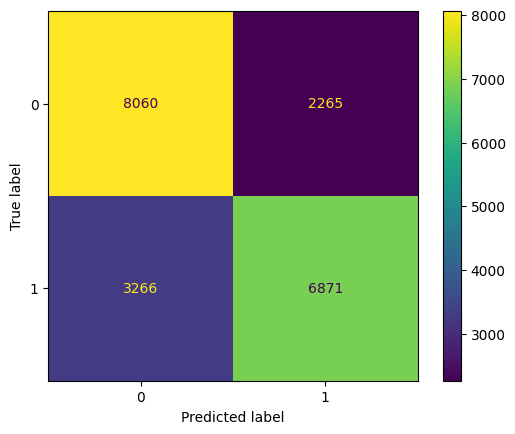

In [110]:
ConfusionMatrixDisplay(cm).plot()

In [111]:
from sklearn.metrics import recall_score,precision_score,f1_score 

In [112]:
recall = recall_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(recall)
print(precision)
print(f1)


0.6778139489000691
0.7520796847635727
0.7130182120064338


In [113]:
# df['cardio'].value_counts()

# XGB Classifier


In [116]:
numerical_pipe = Pipeline(steps=[('minmax',MinMaxScaler())])

categorical_pipe = Pipeline(steps=[('ohe',OneHotEncoder(drop='first'))])

In [117]:
preprocessor = ColumnTransformer(transformers=[('num',numerical_pipe,cols_to_scale),
                                               ('enc',categorical_pipe,cols_to_enc)],
                                remainder='passthrough')

In [118]:
model_pipe = Pipeline(steps=[('preprocessor',preprocessor),
                             ('randomforest',RandomForestClassifier())])

In [119]:
xgb_pipe = Pipeline(steps=[('preprocessor',preprocessor),
                             ('xgb',XGBClassifier())])

In [120]:
xgb_pipe.fit(X_train,y_train)

C:\Users\tanze\Desktop\project_cardio\projectenv\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['age', 'height', 'weight',
                                                   'ap_hi', 'ap_lo', 'bmi']),
                                                 ('enc',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['bp_category'])])),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [121]:
y_pred = xgb_pipe.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,ConfusionMatrixDisplay

In [123]:
score = accuracy_score(y_pred,y_test)
round(score,5)

0.72583

In [124]:
cm = confusion_matrix(y_pred,y_test)

In [125]:
print(cm)

[[7966 3251]
 [2359 6886]]


In [126]:
recall = recall_score(y_pred,y_test)
round(recall,5)

0.74484

In [127]:
param_dict = {
    
    'xgb__learning_rate':[0.1,0.01,0.001,0.0001,0.25,0.3,0.5,0.6,0.05,0.025],
    'xgb__gamma':[0.1,0.5,1,1.5,1.8,2,3,5,7,9,10,11,12,13,14,15,20,25],
    'xgb__reg_lambda':[0,100,110,125,150,170,190,210,230,250,275,290,300],
    'xgb__n_estimators': [1000,1200,1300,1400,1500,1600,1700,1800,1900,2000,3000,4000],
    'xgb__max_depth':[2,4,6,8,9,10,11,12,13,14,15],
    'xgb__objective':['binary:logistic','binary:hinge','multi:softmax']
}

In [128]:
XGB_randomizedsearch = RandomizedSearchCV(xgb_pipe,
                                      param_distributions=param_dict,
                                     cv=10,
                                     n_iter=50,
                                     n_jobs=-1)

In [129]:
XGB_randomizedsearch.fit(X_train,y_train)

C:\Users\tanze\Desktop\project_cardio\projectenv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tanze\Desktop\project_cardio\projectenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanze\Desktop\project_cardio\projectenv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tanze\Desktop\project_cardi

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('minmax',
                                                                                                MinMaxScaler())]),
                                                                               ['age',
                                                                                'height',
                                                                                'weight',
                                                                                'ap_hi',
                                                                                'ap_lo',
                                                                                'bmi']),
                                                                              ('enc',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['bp_category'])])),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=N...
                                                       13, 14, 15, 20, 25],
                                        'xgb__learning_rate': [0.1, 0.01, 0.001,
                                                               0.0001, 0.25,
                                                               0.3, 0.5, 0.6,
                                                               0.05, 0.025],
                                        'xgb__max_depth': [2, 4, 6, 8, 9, 10,
                                                           11, 12, 13, 14, 15],
                                        'xgb__n_estimators': [1000, 1200, 1300,
                                                              1400, 1500, 1600,
                                                              1700, 1800, 1900,
                                                              2000, 3000,
                                                              4000],
                                        'xgb__objective': ['binary:logistic',
                                                           'binary:hinge',
                                                           'multi:softmax'],
                                        'xgb__reg_lambda': [0, 100, 110, 125,
                                                            150, 170, 190, 210,
                                                            230, 250, 275, 290,
                                                            300]})

In [130]:
XGB_randomizedsearch.best_score_

0.7358356586834885

In [131]:
XGB_randomizedsearch.best_params_

{'xgb__reg_lambda': 100,
 'xgb__objective': 'binary:logistic',
 'xgb__n_estimators': 1800,
 'xgb__max_depth': 13,
 'xgb__learning_rate': 0.6,
 'xgb__gamma': 1.8}

In [132]:
bestxgb = XGB_randomizedsearch.best_estimator_

In [133]:
pred = bestxgb.predict(X_test)

In [134]:
score = accuracy_score(pred,y_test)
round(score,5)

0.73101

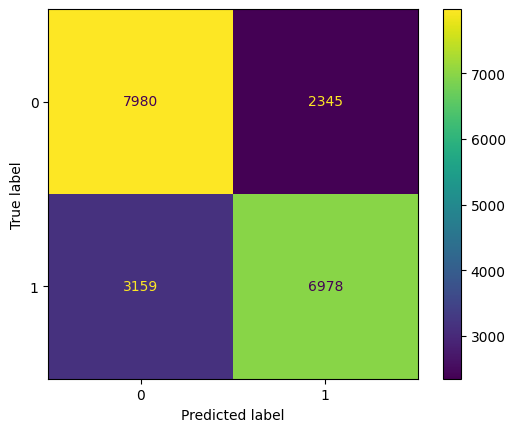

In [135]:
cm = confusion_matrix(y_test,pred)

ConfusionMatrixDisplay(cm).plot()

plt.show()

In [136]:
recall = recall_score(pred,y_test)
round(recall,5)

0.74847

In [161]:
import pickle

In [162]:
bestxgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  ['age', 'height', 'weight',
                                                   'ap_hi', 'ap_lo', 'bmi']),
                                                 ('enc',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['bp_category'])])),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, gamma=1.8, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.6,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=13, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1800, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [164]:
pickle.dump(bestxgb,open('model.pkl','wb'))

# ------------------------------------------------------------------------------------------------------- 

# Recheck 

# Applying PCA 

In [140]:
from sklearn.decomposition import PCA

In [141]:
pca = PCA()

In [142]:
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bp_category
46861,19073.0,2,166,68.0,120,80,1,1,0,0,1,24.677021,Hypertension Stage 1
66280,15156.0,1,152,60.0,120,80,1,1,0,0,1,26.666667,Hypertension Stage 1
29903,19787.0,1,153,78.0,120,80,1,1,0,0,1,33.320518,Hypertension Stage 1
62125,17308.0,1,168,62.0,120,80,1,1,1,0,1,21.967120,Hypertension Stage 1
5123,22820.0,1,156,74.0,150,100,1,2,0,0,1,30.407627,Hypertension Stage 2


In [152]:
numerical_pipe = Pipeline(steps=[('minmax',MinMaxScaler())])

categorical_pipe = Pipeline(steps=[('ohe',OneHotEncoder(drop='first'))])

In [153]:
preprocessor = ColumnTransformer(transformers=[('num',numerical_pipe,cols_to_scale),
                                               ('enc',categorical_pipe,cols_to_enc)],
                                remainder='passthrough')

In [154]:
pca_pipe = Pipeline(steps=[('preprocessor',preprocessor),
                             ('pca',PCA())])

In [156]:
X_train_enc = pca_pipe.fit_transform(X_train)

In [157]:
X_train_enc

array([[-0.56041276, -0.34293006,  0.57592576, ...,  0.04110088,
         0.02078135,  0.00121717],
       [-0.55938789, -0.40384686, -0.39251482, ...,  0.01244386,
         0.02178319,  0.01629594],
       [-0.44140374, -0.3513551 , -0.27750826, ...,  0.06857846,
         0.02184912,  0.02558011],
       ...,
       [-0.60471884, -0.35047313,  0.60502924, ...,  0.01338025,
         0.02293552,  0.00966181],
       [-0.55584738, -0.40308028, -0.21259509, ...,  0.02040047,
         0.01832893,  0.00216479],
       [-0.45242262, -0.26068803,  0.76814582, ...,  0.07028175,
         0.02904461, -0.02865919]])

In [159]:
pca_pipe.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14'],
      dtype=object)

In [160]:
pca_pipe.

AttributeError: 'Pipeline' object has no attribute 'components_'

In [165]:
list(X_train.columns)

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'bmi',
 'bp_category']